In [37]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import os, sys
import cv2
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
DATADIR = "/home/renuka/Desktop/english-typed-alphabets-and-numbers-dataset/English/Fnt/"
categories = ["0","1","2","3","4","5","6","7","8","9",
              "A","a","B","b","c","D","d","E","e","F","f","G","g","H","h","I","i","j","k","L","l","M",
              "m","N","n","o","p","Q","q","R","r","s","T","t","U","u","v","w","x","Y","y",
              "z","forward slash","#",",","$","&","%","^","+","?","non_char"
             ]

In [39]:
import pickle
x = pickle.load(open("x.pickle","rb"))
y = pickle.load(open("y.pickle","rb"))
x = x/255.0

In [40]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y)

In [50]:
train=x[:15500]
test=x[15600:]
#print(len(Y))
y_train=y[:15500]
y_test=y[15500:]
#print(len(y_test))

trainData = train.astype("float32")
testData = test.astype("float32")


In [68]:
model = Sequential()
model.add(Conv2D(40, (5, 5), input_shape=(50, 50,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(25, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(62, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(trainData, y_train, validation_data =(testData, y_test), epochs=8, batch_size=200)
# Final evaluation of the model
scores = model.evaluate(testData, y_test, verbose=0)
#print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 15500 samples, validate on 241 samples
Epoch 1/8
15500/15500 [==============================] - 42s 3ms/sample - loss: 2.0550 - acc: 0.5675 - val_loss: 1.2246 - val_acc: 0.7261
Epoch 2/8
15500/15500 [==============================] - 44s 3ms/sample - loss: 0.9444 - acc: 0.7774 - val_loss: 0.7685 - val_acc: 0.8050
Epoch 3/8
15500/15500 [==============================] - 43s 3ms/sample - loss: 0.6250 - acc: 0.8360 - val_loss: 0.5800 - val_acc: 0.8506
Epoch 4/8
15500/15500 [==============================] - 47s 3ms/sample - loss: 0.4842 - acc: 0.8625 - val_loss: 0.5220 - val_acc: 0.8589
Epoch 5/8
15500/15500 [==============================] - 45s 3ms/sample - loss: 0.3999 - acc: 0.8821 - val_loss: 0.4338 - val_acc: 0.8963
Epoch 6/8
15500/15500 [==============================] - 45s 3ms/sample - loss: 0.3498 - acc: 0.8931 - val_loss: 0.4201 - val_acc: 0.8921
Epoch 7/8
15500/15500 [==============================] - 45s 3ms/sample - loss: 0.3144 - acc: 0.9005 - val_loss: 0.3868 - va

In [69]:
model.save("sample.model")

predicted character - m
predicted character - t
predicted character - non_char
predicted character - e


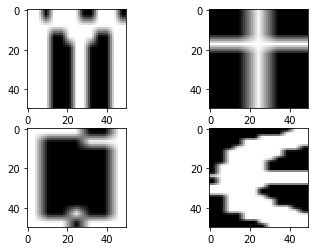

In [75]:
import matplotlib.pyplot as plt


test_images = testData[58:62]


test_images = test_images.reshape(test_images.shape[0], 50, 50)
#print("[test images shape - {}".format(test_images.shape))

for i, test_image in enumerate(test_images, start=1):
    
    org_image = test_image

    
    test_image = test_image.reshape(-1,50,50,1)

    
    prediction = model.predict_classes(test_image, verbose=0)

    
    print('predicted character - {}'.format(categories[prediction[0]]))
    plt.subplot(220+i)
    plt.imshow(org_image, cmap=plt.get_cmap('gray'))

plt.show()

In [22]:
#from keras.models import load_model
model = load_model("sample.model")

In [40]:
img_array = cv2.imread("/home/renuka/Desktop/output/chars/3.png",cv2.IMREAD_GRAYSCALE)
new_array = cv2.resize(img_array,(70,70))
test_image = new_array.reshape(-1,70,70,1)
prediction = model.predict_classes(test_image, verbose=0)
print('{}'.format(categories[prediction[0]]))

m


In [55]:
path = "/home/renuka/Desktop/output/chars/"
f = open('text','a+') 
#for folder in os.listdir(path):
#    for word in os.listdir(os.path.join(path,folder)):
for char in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,char),cv2.IMREAD_GRAYSCALE)
    if img_array is not None:
        new_array = cv2.resize(img_array,(70,70))
        test_image = new_array.reshape(-1,70,70,1)
        prediction = model.predict_classes(test_image, verbose=0)
        f.write(categories[prediction[0]])
        print(str(char)+"="+'{}'.format(categories[prediction[0]]))
        #f.write(" ")
    #f.write("\n")
f.close()

3202g.png=x
37M.png=q
14M.png=n
15812.png=G
42M.png=u
4007g.png=L
5781.png=i
